 "[PR] Attention Is All You Need!"
> "Awesome summary"

- toc:true
- branch: master
- badges: true
- comments: true
- author: RyuHan
- categories: [NLP, Attention]

- 해당 논문의 원본은 https://arxiv.org/abs/1706.03762 에서 확인할 수 있습니다.
- 아래 포스터는 상시적으로 업데이트 될 수 있음을 알려드립니다.
- 오류 등을 발견하면, 댓글로 알려주세요!

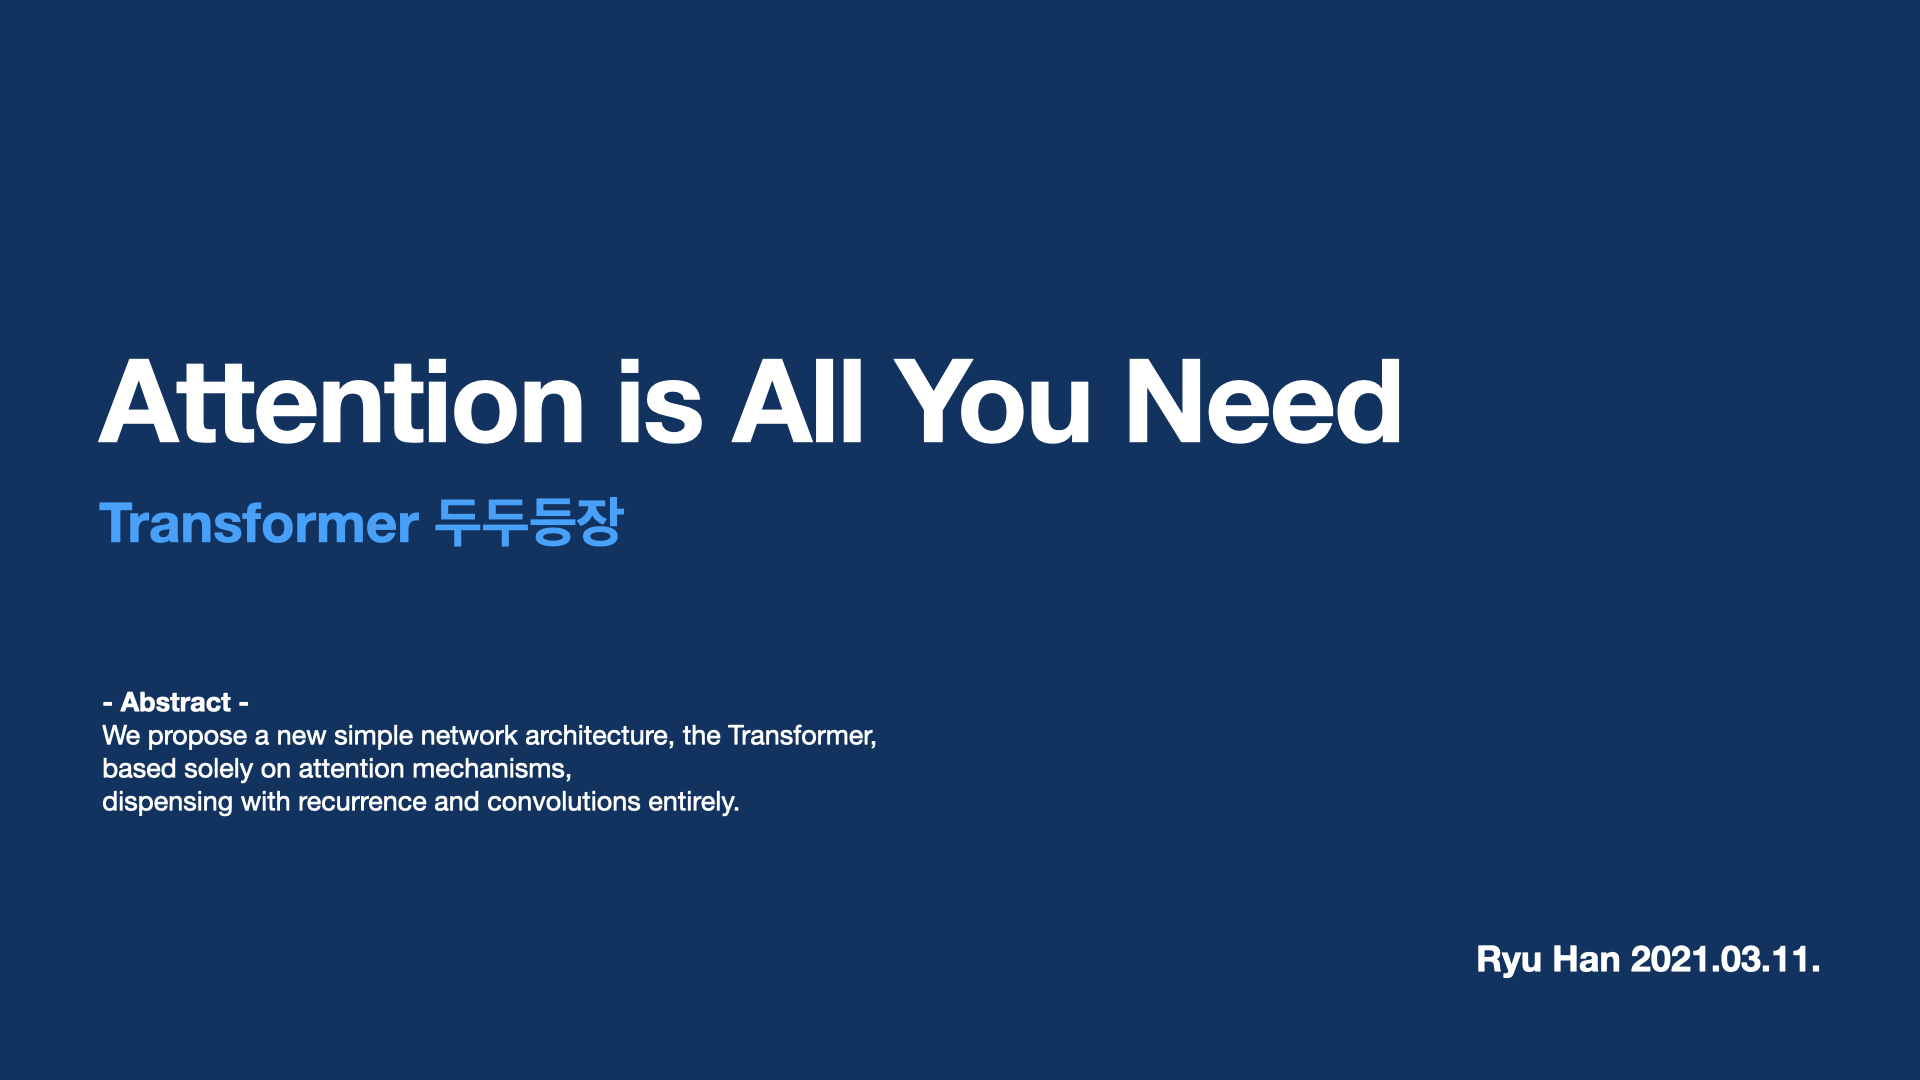

리뷰할 논문 Attention Is All You Need는 구글 리서치팀이 2017년 발표했다. 이 논문을 요약하자면,Transfomer라는 새로운 네트워크 아키텍처를 제안했다는 것이다. 이 논문이 NLP 발전 타임라인, 특히 기계번역 태스크 발전 타임라인에서 차지하는 위치를 살피는 것으로 리뷰를 시작한다.

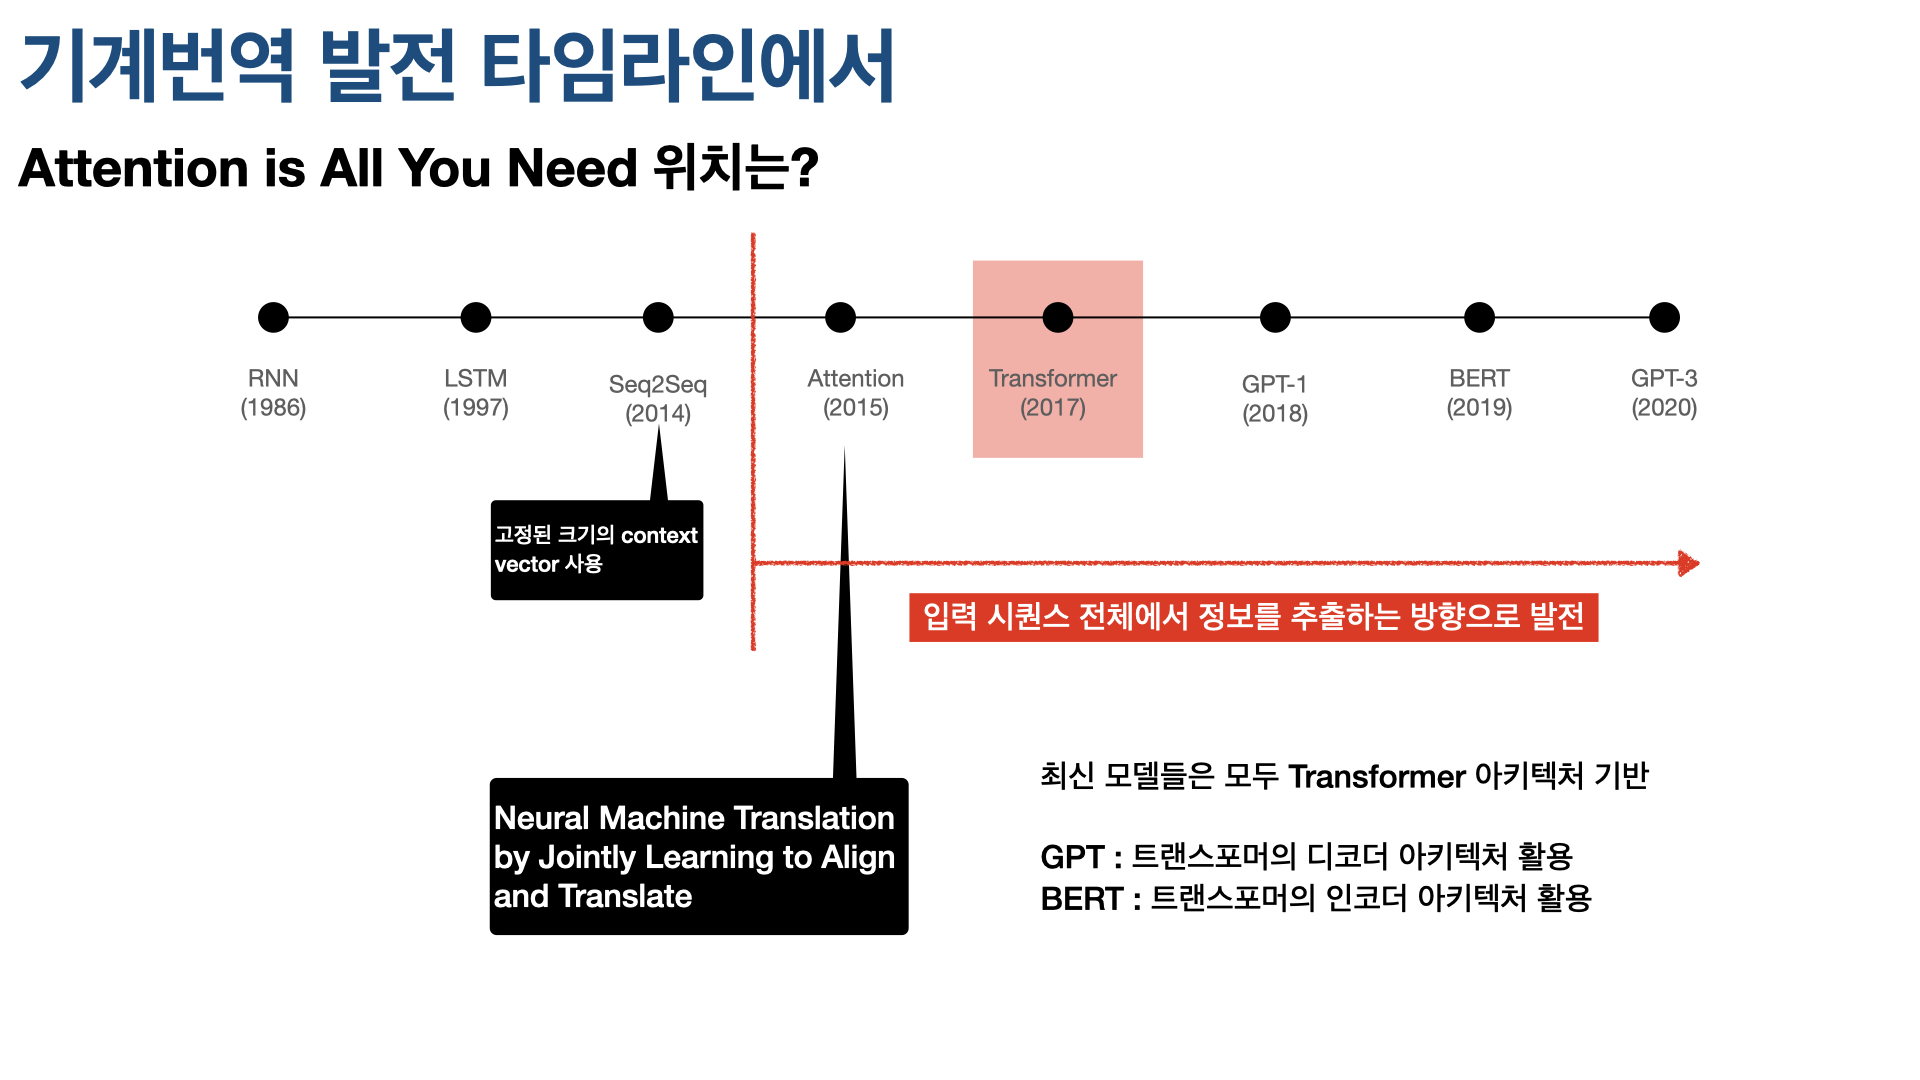

2014년 제안된 Seq2Seq은 인코더-디코더 모델로, 인코더 및 디코더에 RNN류 네트워크를 사용한다. 번역 태스크에서 살펴보면 Encoder로 소스 언어로 쓰인 문장의 정보를 잘 반영하도록 압축한 context vector를 만들고 이를 Decoder에서 정보가 유실되지 않게 잘 복원하는 것. 이때 인코더와 디코더에서 RNN류 네트워크를 사용하는 것은 텍스트 데이터가 sequential 데이터이기 때문이다. 즉 단어가 문장에서 등장하는 순서나 위치가 중요하기 때문이다. RNN류 네트워크를 이용해 텍스트 데이터의 정보를 잘 담아낼 수 있었지만, Seq2Seq 모델은 고정된 문맥 벡터를 사용하기 때문에 문장이 길어지면 정보를 충분히 담기 어려운 한계가 있었다.

이 한계를 극복하기 위해 등장한 게 gb이 지난주 리뷰한 Nural Machine Translation by Jointly Learning to Align and Translate 논문이 제안한 Attention 메커니즘이다. 해당 논문은 Seq2Seq 모델에 Attention 매커니즘을 적용해 Decoder에서 Encoder의 모든 출력을 참고할 수 있게 한다. Encoder의 마지막 레이어의 출력만 참고하는 것보다 훨씬 성능이 향상됐고, fixed-length vector의 한계를 극복해 긴 문장에서도 번역 성능을 높일 수 있었다. 획기적인 방법이었지만, 여전히 RNN 네트워크에서 각 단어를 순차적으로 입력받아 학습해야 하기 때문에 많은 시간과 컴퓨팅 파워가 드는 한계가 존재다. (The fundamental constraint of sequential computioation remains.)

이 한계를 극복하기 위해 구글 리서치팀이 떠올린 아이디어가 RNN을 아예 사용하지 않는 것이고, 이게 바로 Transformer이다. 기존 Encoder-Decoder 컨셉을 유지하되, RNN 네트워크를 사용하지 않고 Attention만으로 입력 데이터(소스 언어로 쓰인 문장)의 중요한 정보를 찾아낸다.

2021년 현재 기준, 최신 고성능 모델들은 Transformer 아키텍처를 기반으로 하고 있다. 예를 들어, GPT는 Trnasformer의 Decoder 아키텍처를 활용하고, BERT는 Transformer의 인코더 아키텍처를 활용하는 식이다

“Transformer is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequence-aligned RNNs or convolution.”

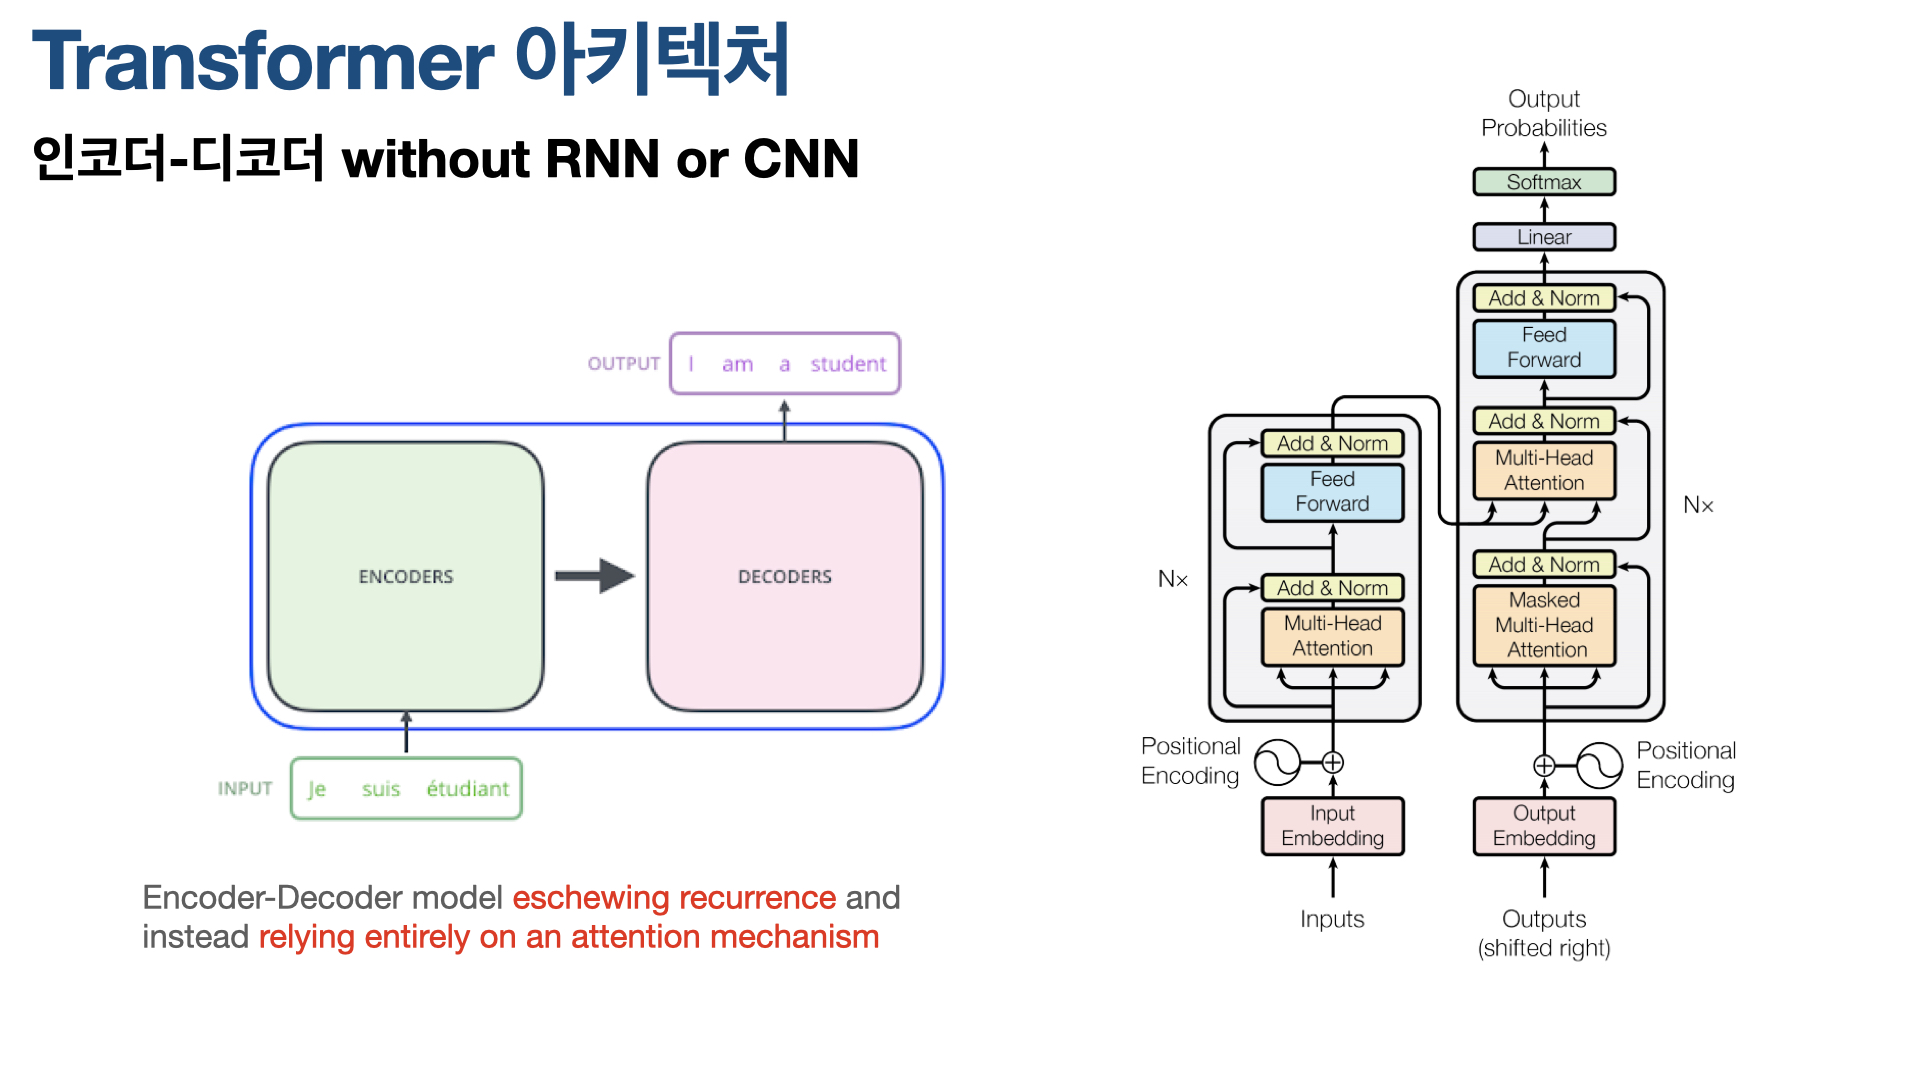

모델 아키텍처는 위와 같다. 기본적으로 Seq2Seq과 같이 인코더-디코더 모델이다. 왼쪽의 인코더와 오른쪽의 디코더로 구성돼 있다. 그리고 인코더는 두 개의 서브 레이어, 디코더는 세 개의 서브 레이어로 구성돼 있다.중요한 점이 RNN이나 CNN을 사용하지 않고, 대신 Attention을 사용한다는 것이다.

아키텍처를 살피기 전, Transformer를 이해하기 위해 중요한 개념인 ‘Self-Attention’을 살펴본다.

# 1. Self-Attention이란?

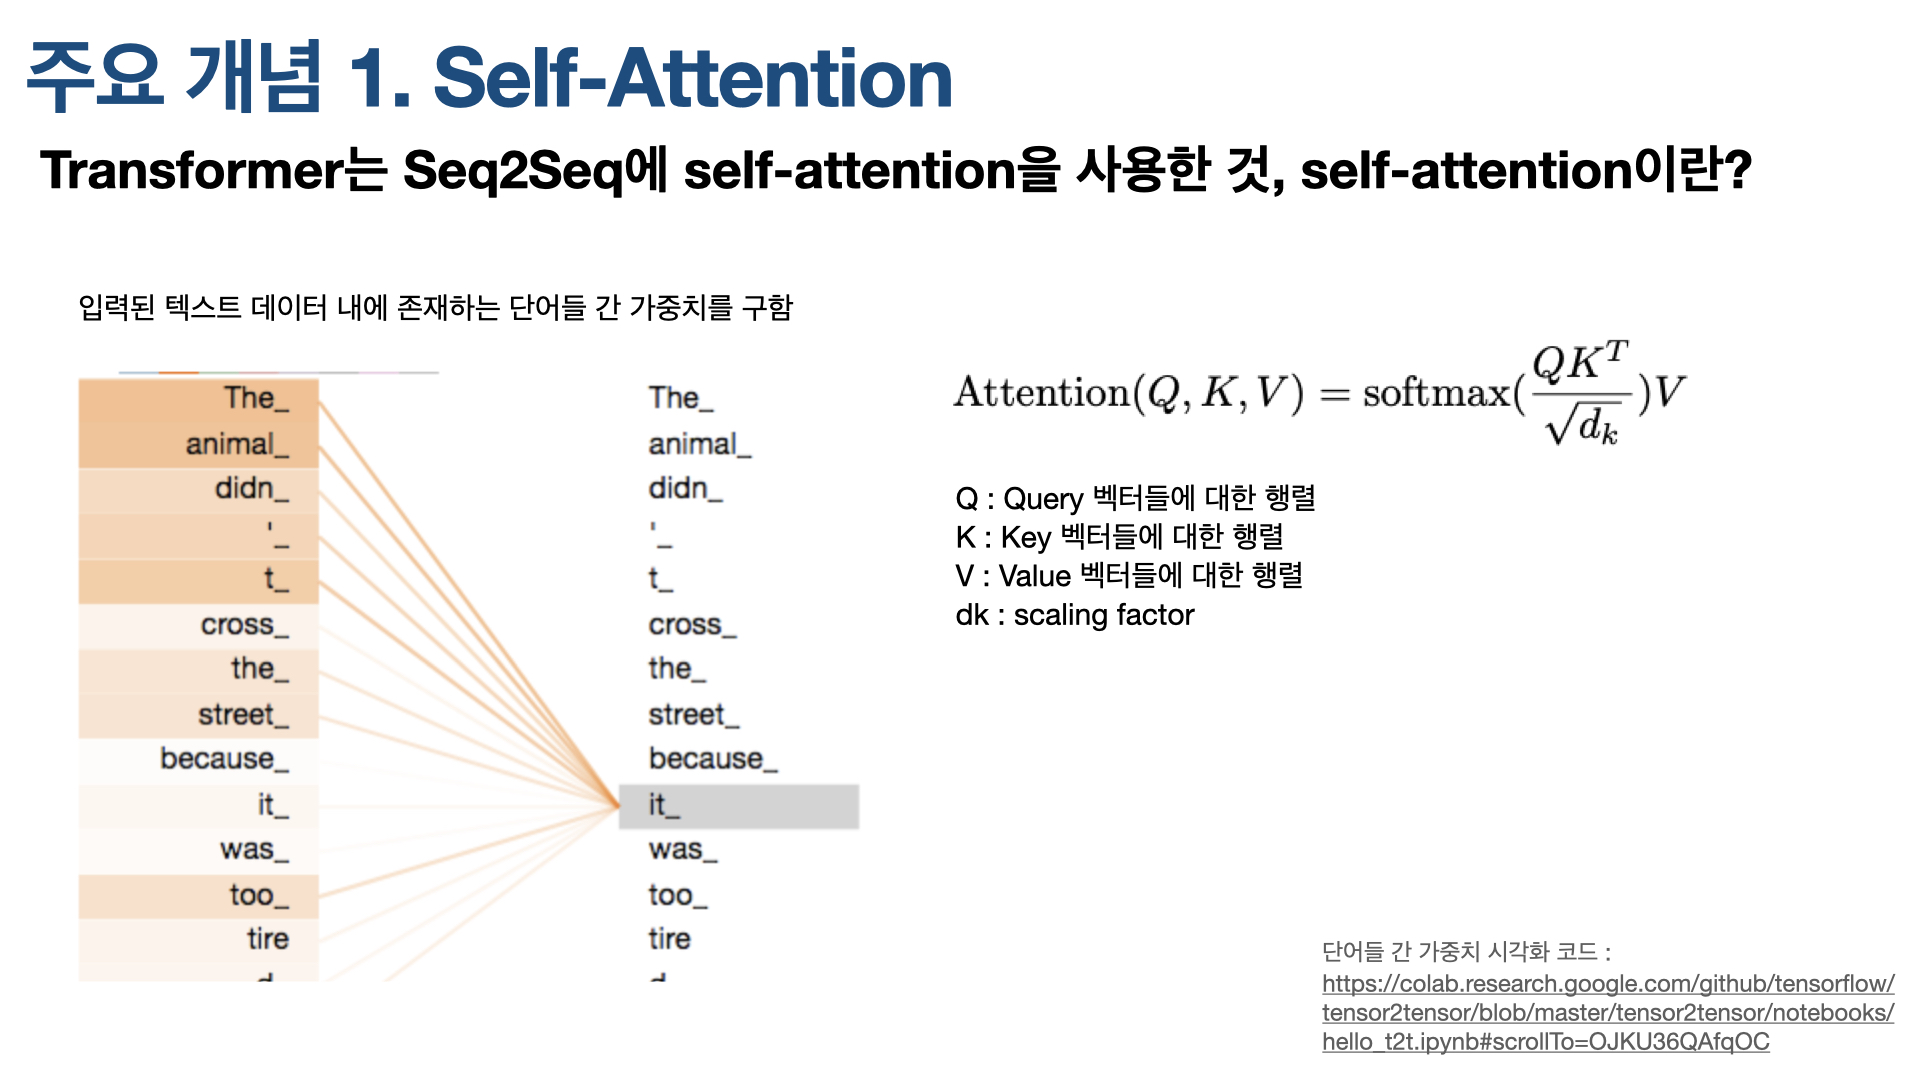

Self-Attention은 Nural Machine Translation by Jointly Learning to Align and Translate이 제안한 Attention 메커니즘과 다소 다르다. Attention은 디코더에서 인코더에 Quary를 날려, 어떤 단어에 주목해야 할 지, 즉 Attention을 둬야할 지 묻는다. Self-Attention은 이것과 달리, 입력된 하나의 문장 안에서 문장을 이루는 각 단어들이 서로에 대해 갖는 중요도(attention)을 구한다. 때문에 흔히 지시대명사가 무엇을 가르키는 지 아는 것에 유용하다. 또 단어들 간 가중치를 시각화해 볼 수 있다는 것도 장점이다.

하나의 문장 안에서 단어들이 서로에 대해 갖는 중요도가 계산된다는 것은 무슨 의미일까? 실제 문장을 예로 들어 설명한다.

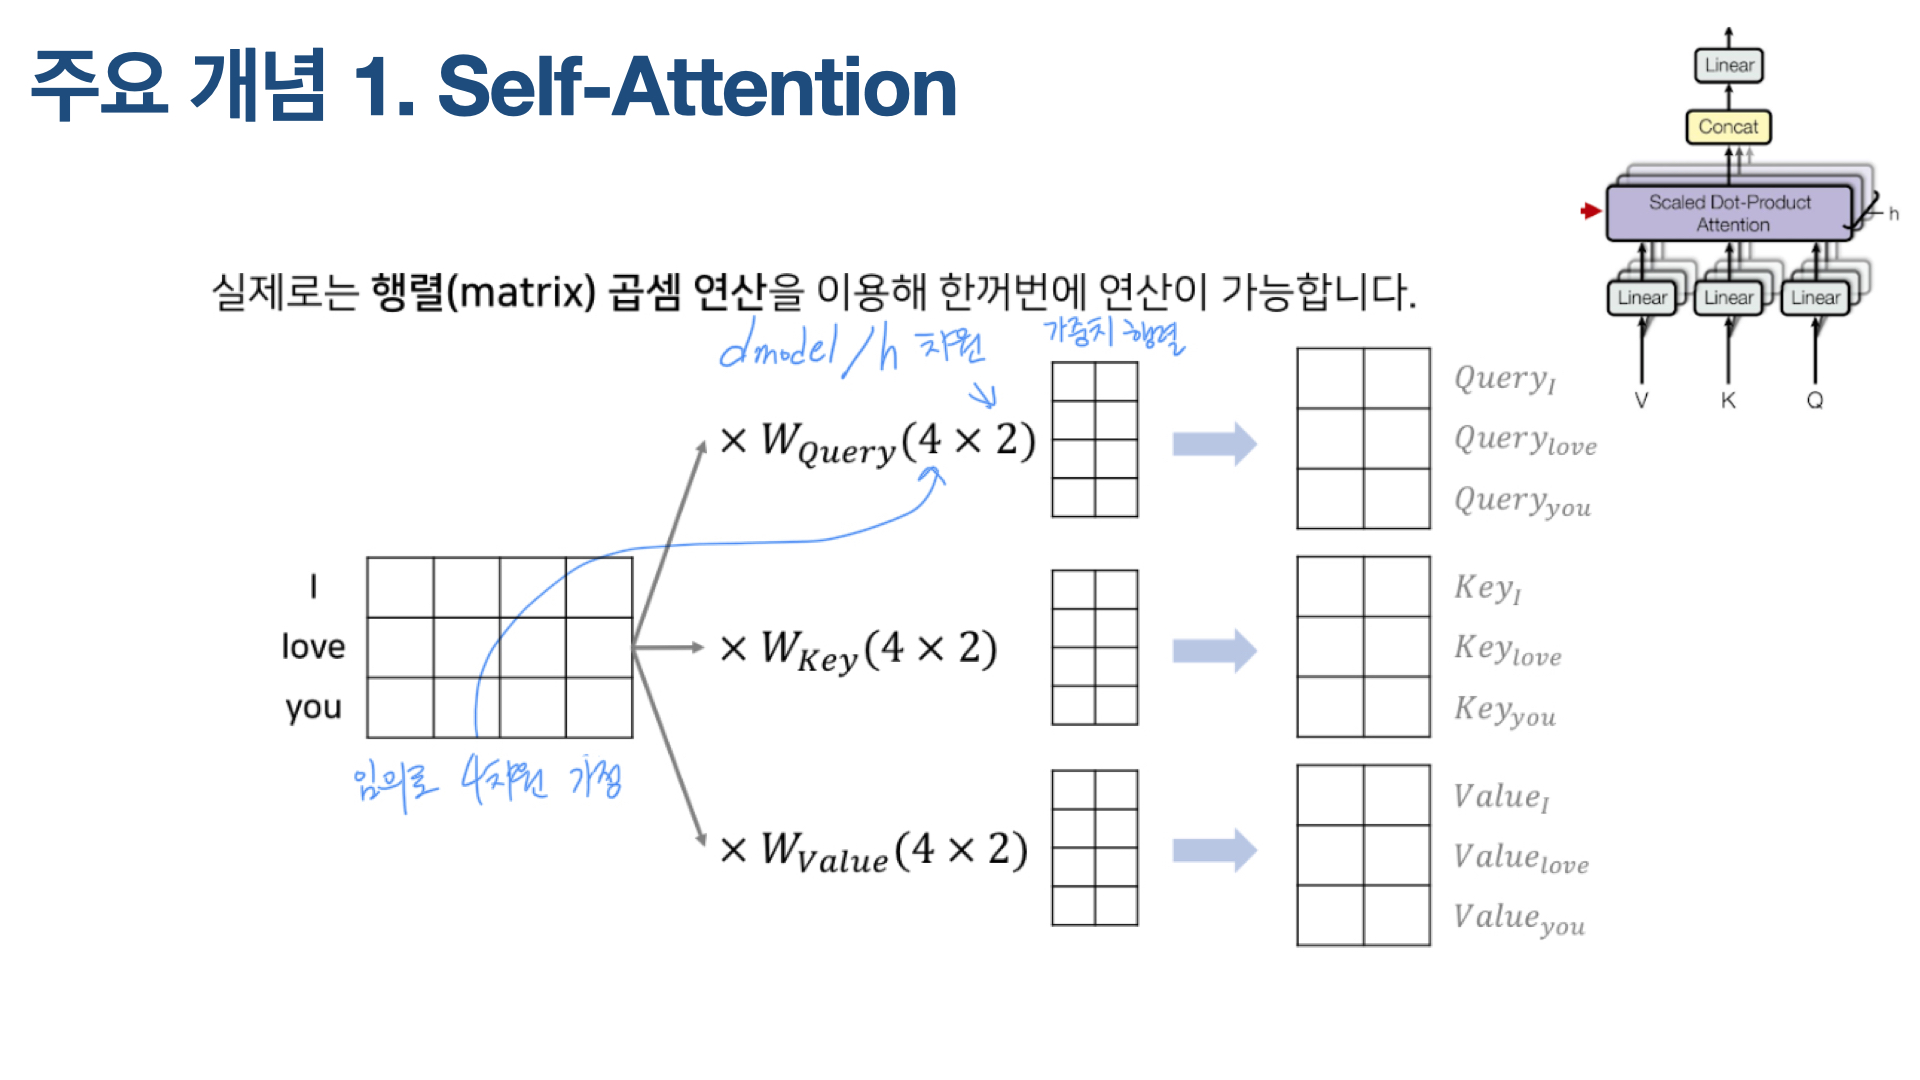

Attention(Q, K, V) 수식은 위와 같다. Q와 K 전치행렬을 곱하면, 그것이 attention score(attention energy라고 표현하기도 함) 되고, 여기에 루트 df를 나눈 값에 softmax 함수를 씌운 게 가중치가 된다. 마지막으로 V를 곱하면 최종적으로 value vector가 나온다.

주요 개념인 self-attention을 알아봤으니, 본격적으로 Transformer 아키텍처를 살펴본다.

# 2. Transformer 아키텍처 1 - 인코더

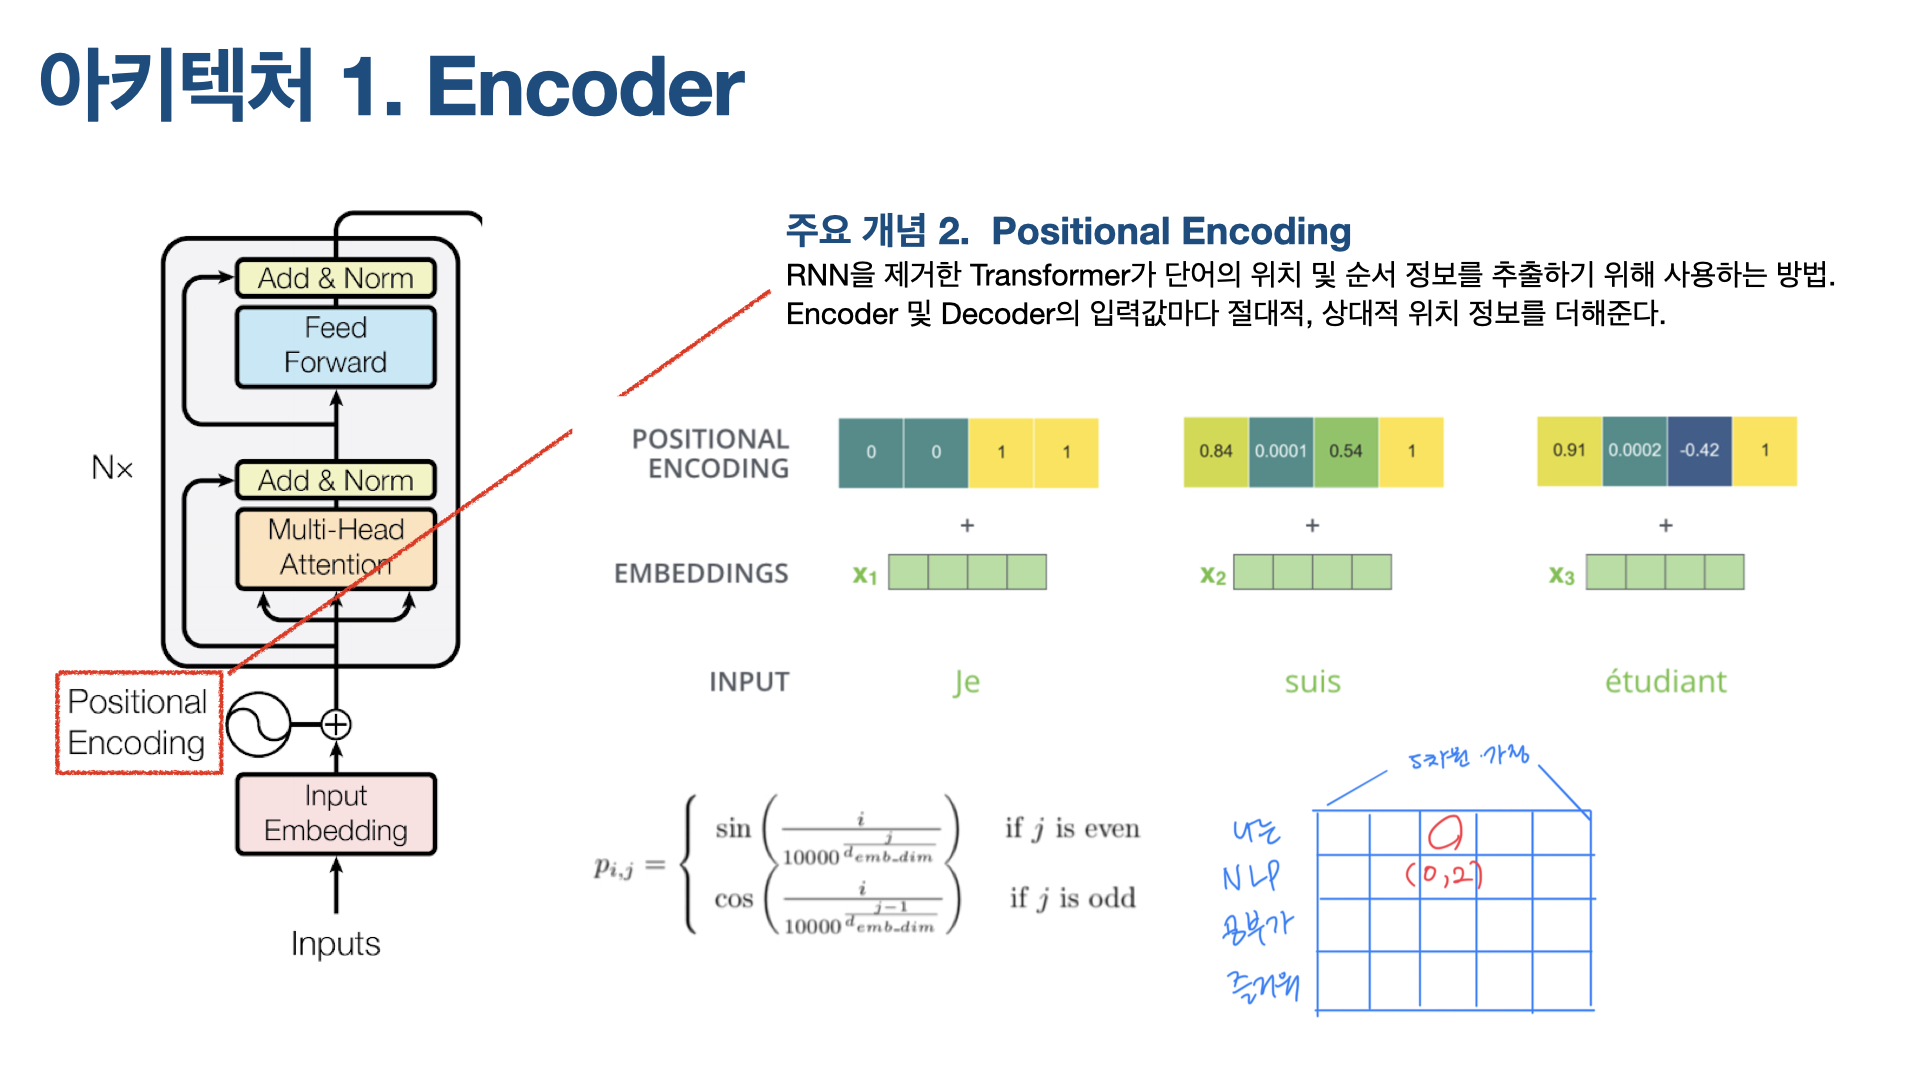

앞서 설명했듯, 인코더는 Multi-head attention 레이어와 Feed Forward 레이어, 총 2개의 서브 레이어로 구성된다. 중요한 게 Multi-head attention 레이어다. 이 레이어에는 앞서 설명한 self-attention이 여러 개 (multi-head) 병렬적으로 나열돼 있다.

이를 염두하면서 차근차근 문장이 입력됐을 때 Transformer의 인코더 안에서 어떤 과정을 거치는지 살펴본다. Inputs은 실제 Natural language다. 예를 들어 ‘나는 NLP 공부가 즐거워!’ 같은 문장이 인풋이다. 컴퓨터는 이런 텍스트 문장을 계산하지 못하기 때문에 이를 숫자로 바꿔주는 작업이 필요하다. 그 과정이 아키텍처에 나와 있는 Input Embedding이다. Transformer은 바이트 페어 인코딩(Byte Pair Encoding, BPE)으로 인코딩한다. (BPE 참고 글)

이 Input Embedding과 Positional encoding를 element wise로 더해 Attention 레이어에 입력되는데, Positional encoding 개념을 아는 게 중요하다.

## (1) Positional Encoding
먼저 Positional Encoding이 필요한 이유는 Transformer가 RNN이나 CNN 네트워크를 전혀 사용하지 않기 때문이다. Sequential한 텍스트 데이터를 다룰 때 RNN 네트워크가 유용했던 건, RNN을 통해 단어의 위치 및 순서 정보를 활용할 수 있었기 때문이다. RNN을 제거한 Transformer에서는 이 정보를 어떻게 추출할까? 바로 Positional Encoing을 통해서다.

Positional Encoding은 인코더, 디코더 모두에 사용돼 입력되는 단어들의 절대적, 상대적 위치 정보를 더해준다. 달리 말하면, Input vectors에 positional encoding이라고 불리는 벡터를 하나 더 추가하는데, 이는 모델이 시퀀스(문장) 내의 각 단어들의 위치 차이에 대한 정보를 더 잘 알 수 있게 해준다. 이 벡터들을 추가하기로 한 배경에는 이 값들을 단어들의 embedding에 추가하면 Q/K/V 벡터들로 나중에 투영됐을 때 단어들 간의 거리를 늘릴 수 있는 장점이 있기 때문이다.

Positional Encoding을 구하는 식은 위와 같은데, 여기에서 i는 현재 단어가 문장에서 갖는 위치(논문에서는 pos라고 표현돼 있음), j는 차원이다.

예를 들어, ‘나는 NLP 공부가 즐거워’라는 문장이 있다. 문장의 각 단어를 5차원 벡터로 임베딩했다고 가정하면, ‘나는 NLP 공부가 즐거워’는 위 그림 오른쪽 하단과 같은 4X5 행렬이 된다. 이 행렬에서 빨간 동그라미가 쳐진 부분의 (i, j)는 (0, 2)가 된다.

## (2) Multi-head Attention
Input vectors + Positional Encoding한 값이 multi-head attention 레이어로 들어가는데, 논문에서는 인코더의 이 부분을 scaled dot-product attention이라고 한다. 이 multi-head attention 부분은 매우 중요한데, 그 이유는 이 부분에서 Transformer의 특징인 ‘병렬 처리’가 발생하기 때문이다.

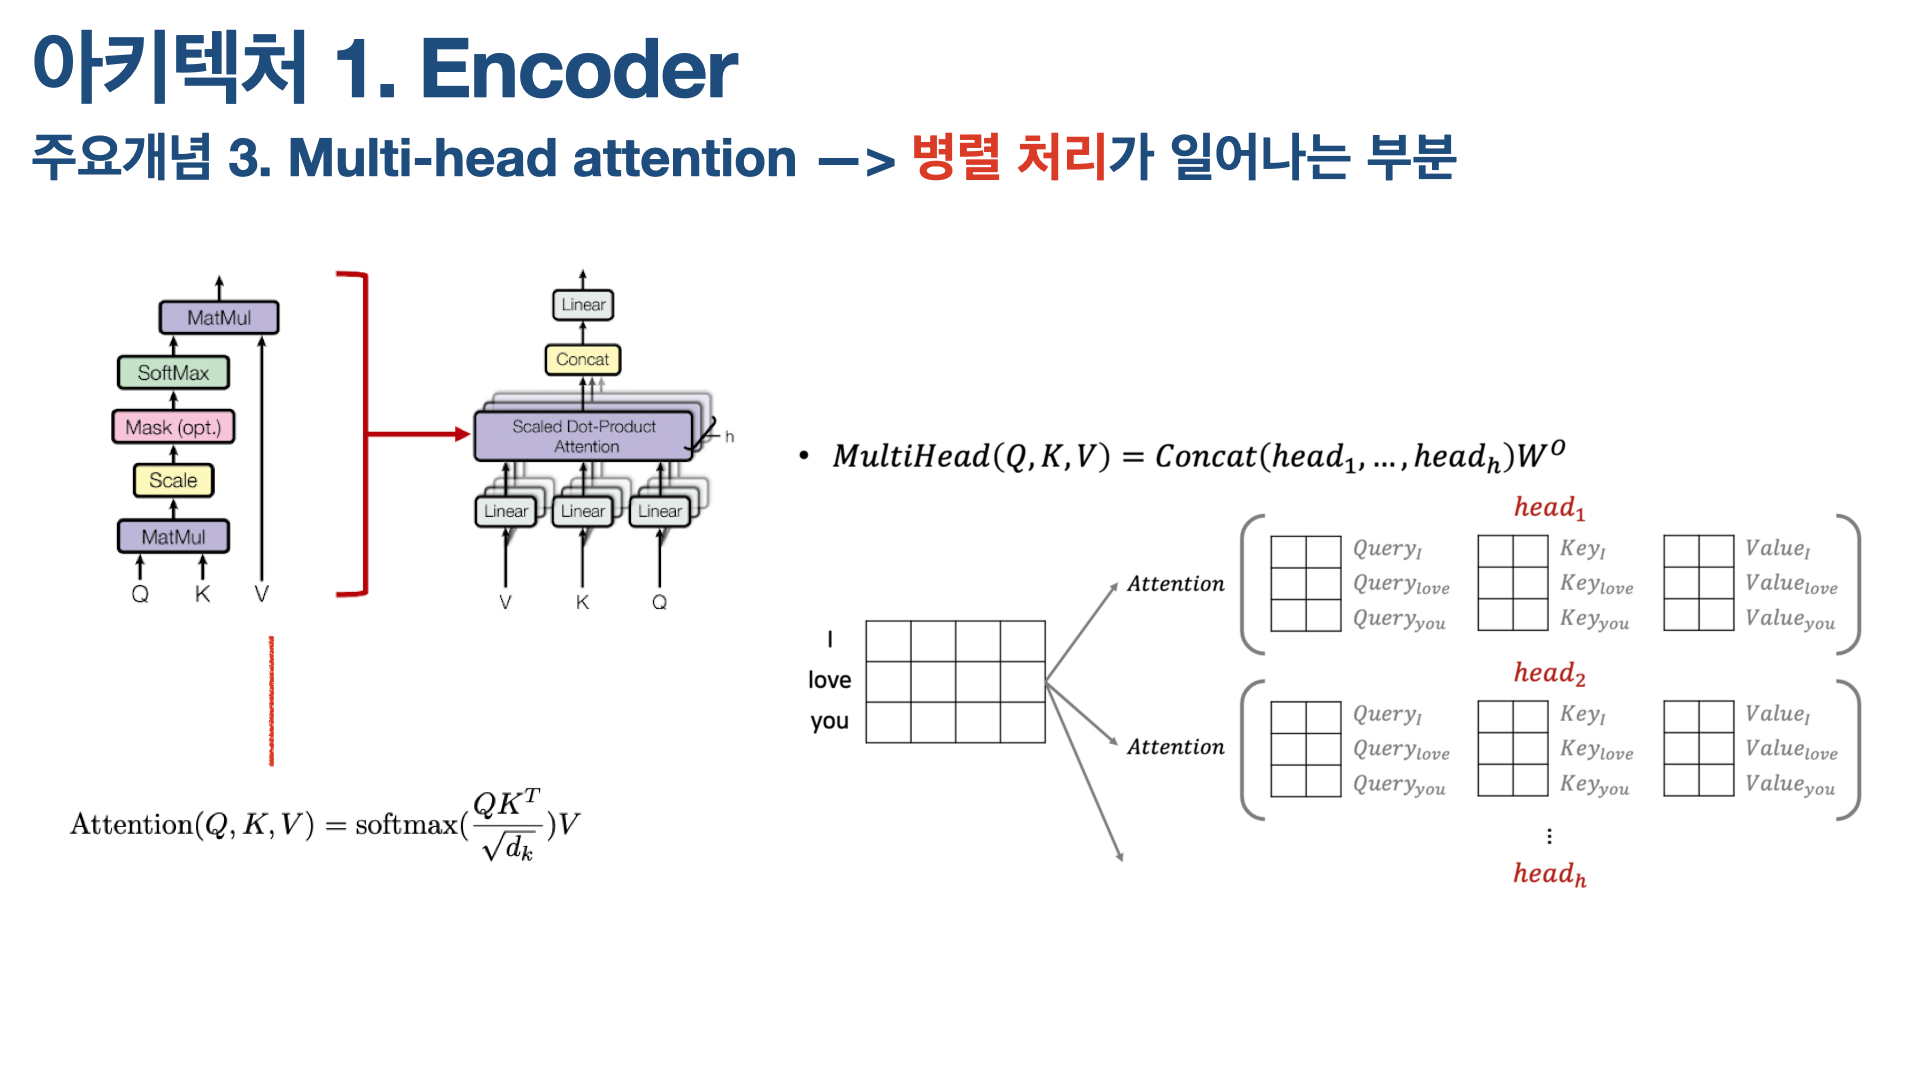

Transformer의 주요 특장점 중 하나는 순차적으로 단어를 입력받아 계산을 하는 RNN류와 달리, 문장을 행렬 형태로 한꺼번에 받아 병렬화된 계산을 수행한다는 것이다. 여기에서 이 병렬화가 이뤄지는 부분이 multi-head attention 부분이다. h개의 self-attention 레이어가 병렬적으로 처리된다. (논문에서 h=64)

## (3) Add & Norm Layer

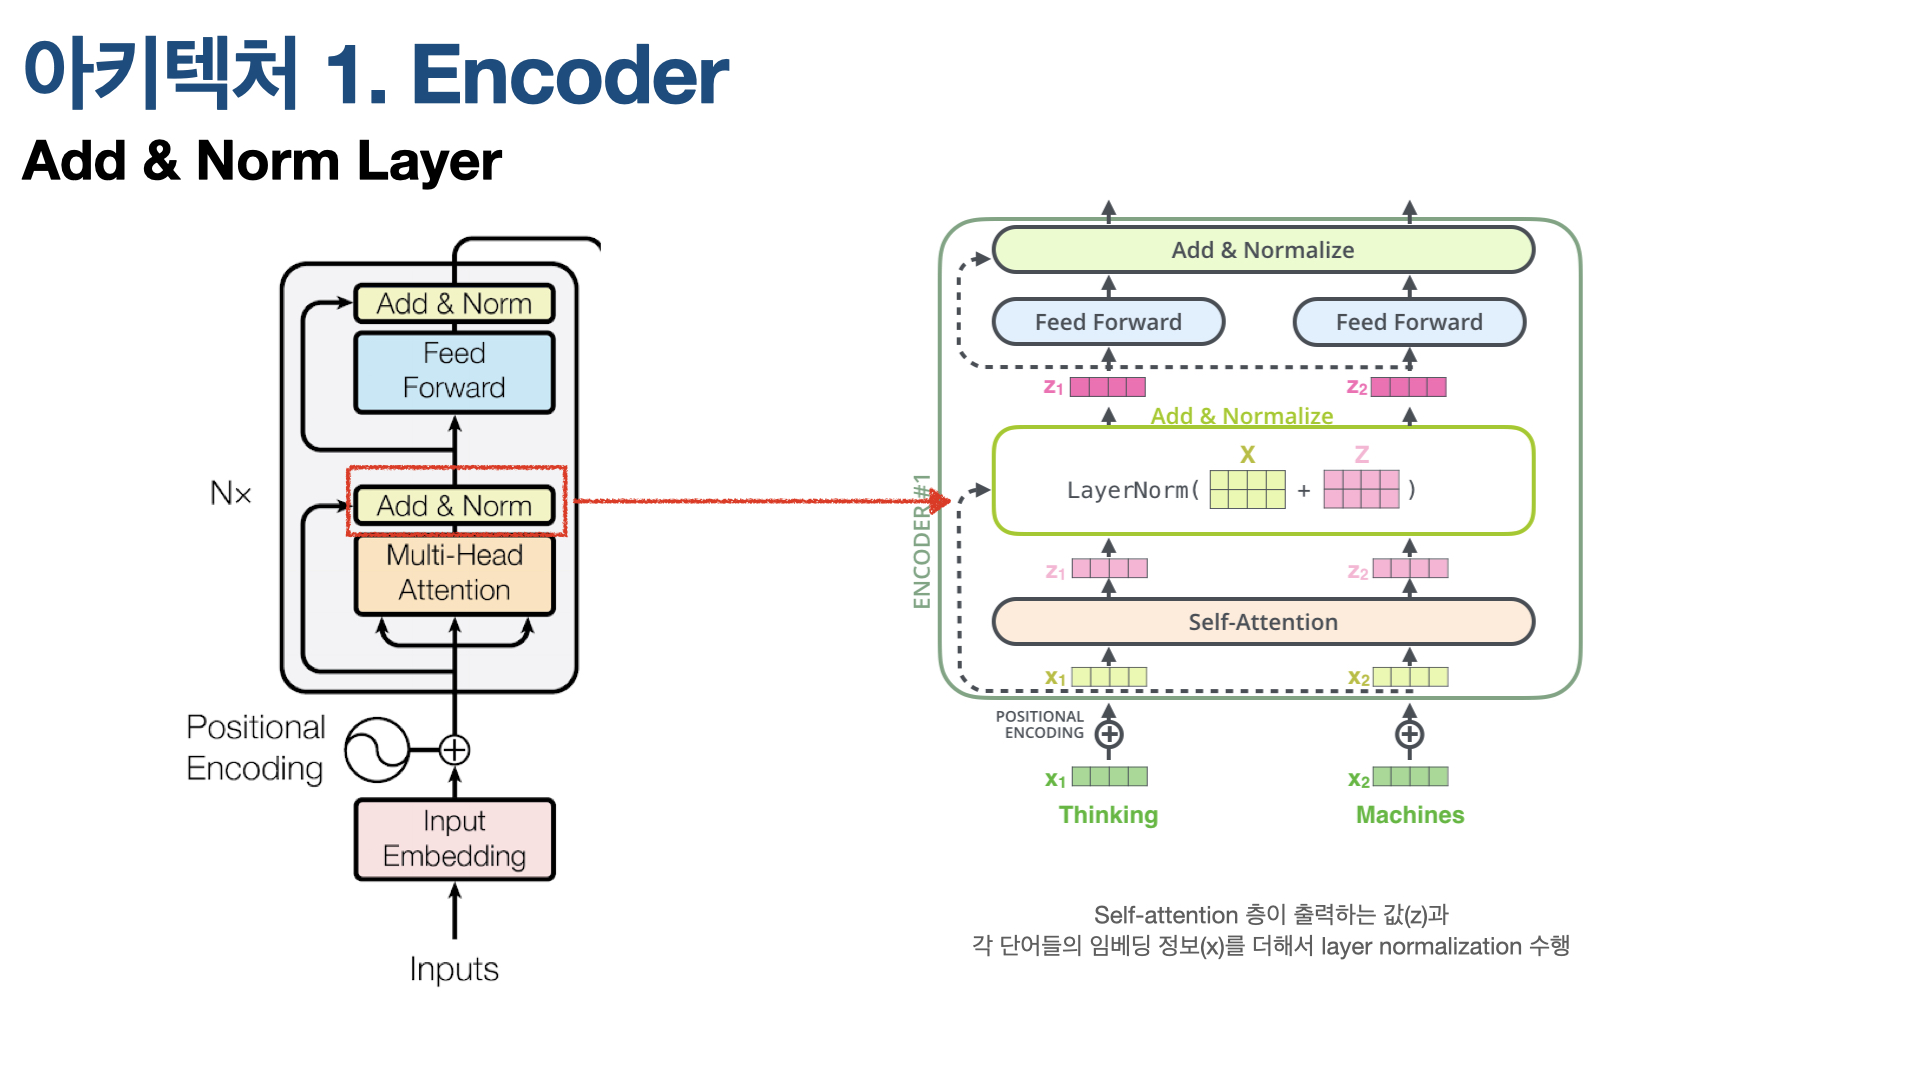

Multi-head Attention 다음에는 Add & Norm Layer 컴포넌트가 있다. Transformer는 Batch Normalization이 아닌 Layer Normalization 방법으로 Normalization한다는 특징이 있다. Batch Normalizatoin이 batchs를 normalization했다면, Layer Normalization은 Feature 차원에서 정규화를 한다. Layer Normalization에 대한 더욱 자세한 설명은 아래 링크들로 갈음한다.

- [Layer Normalization 논문](https://arxiv.org/abs/1607.06450), 2016년 7월
- [Layer Normalization 설명 글](https://paperswithcode.com/method/layer-normalization)

# 3. Transformer 아키텍처 2 - 디코더

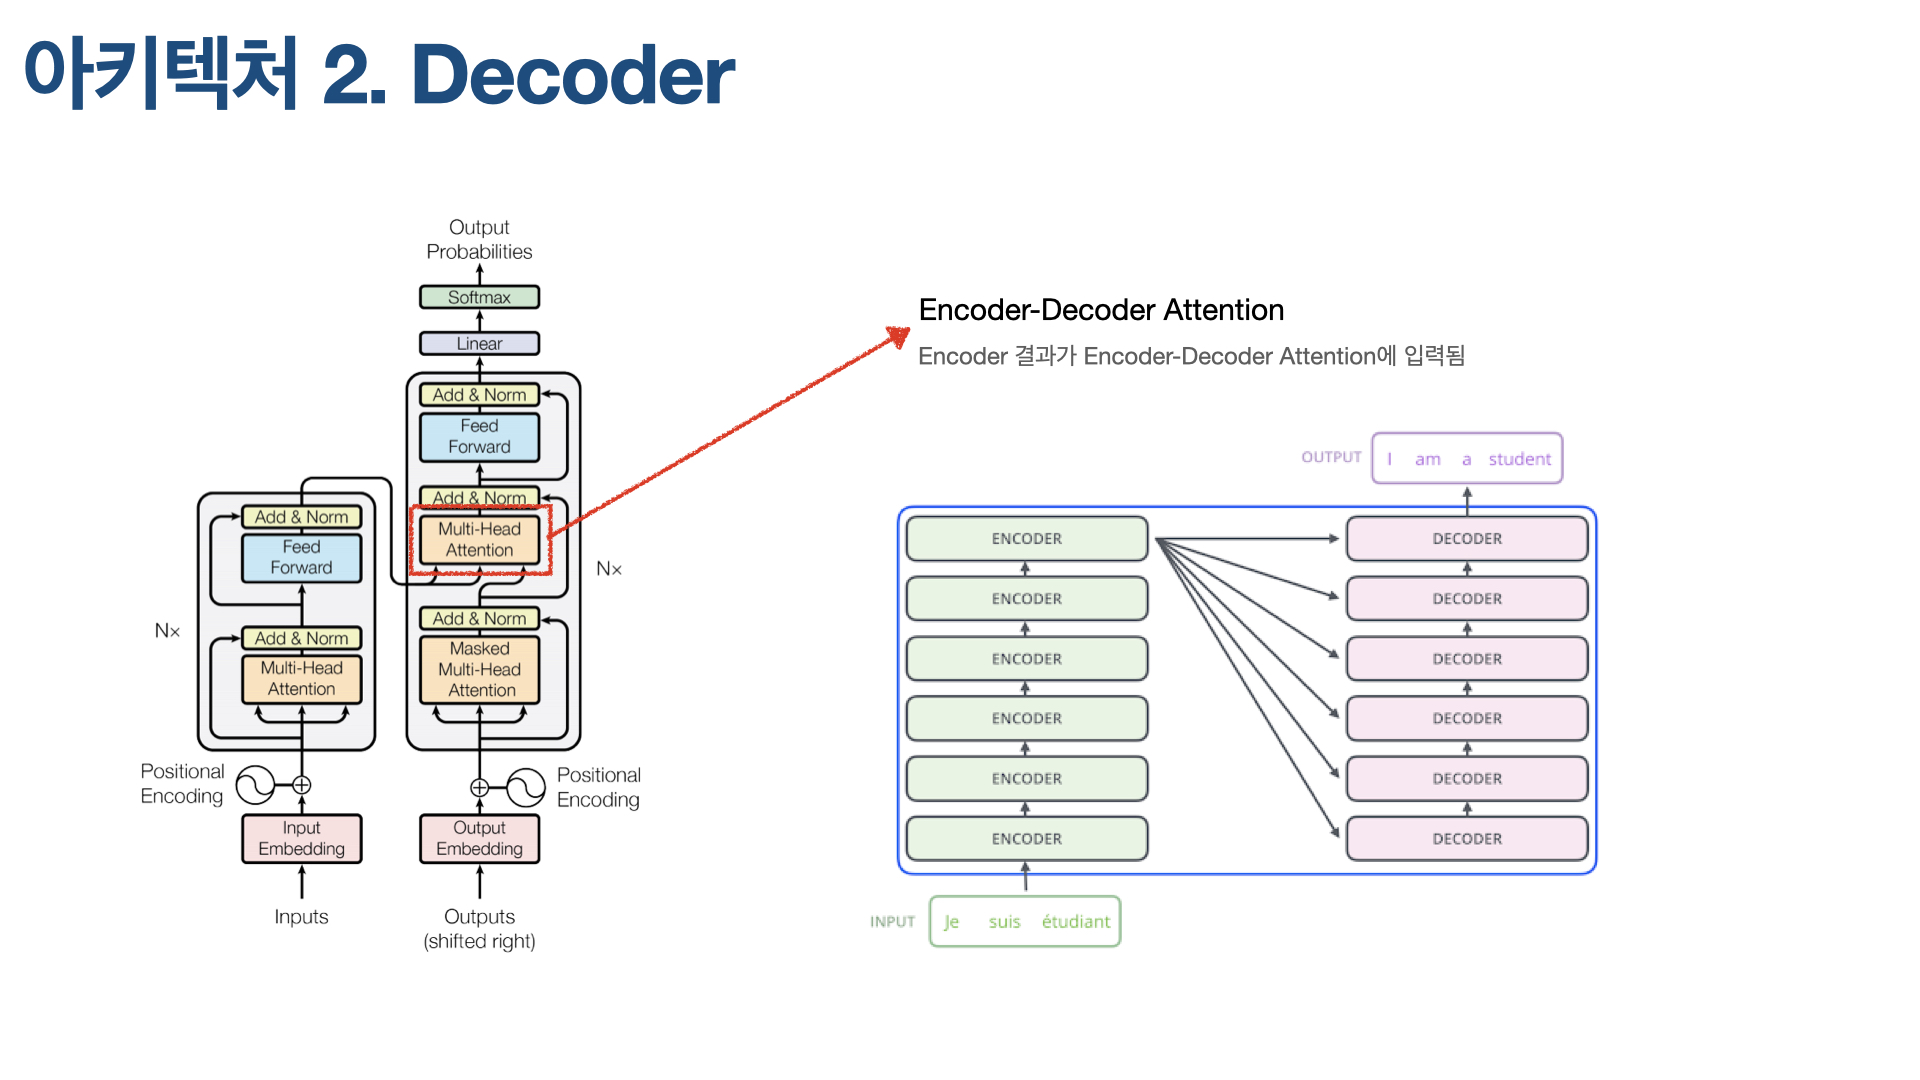

Transformer의 디코더 부분은 Seq2Seq과 매우 유사하다. 서브 레이어 2개로 구성된 인코더와 달리, 디코더는 서브 레이어가 3개다. 인코더에서 Encoder-Decoder Attention이 추가돼 그렇다. Encoder-Decoder Attention은 인코더의 마지막 레이어 출력값이 입력되는 레이어다. 이 Attention은 인코더 부분에 Query를 날린다.

이렇게 3개 서브 레이어로 구성된 디코더 여러 개를 순차적으로 쌓을 수 있는데, Attention Is All You Need 논문에서는 인코더와 디코더 모두 각각 6개씩 쌓았다. 인코더의 결과값은 6개 디코더에 동일하게 입력된다.

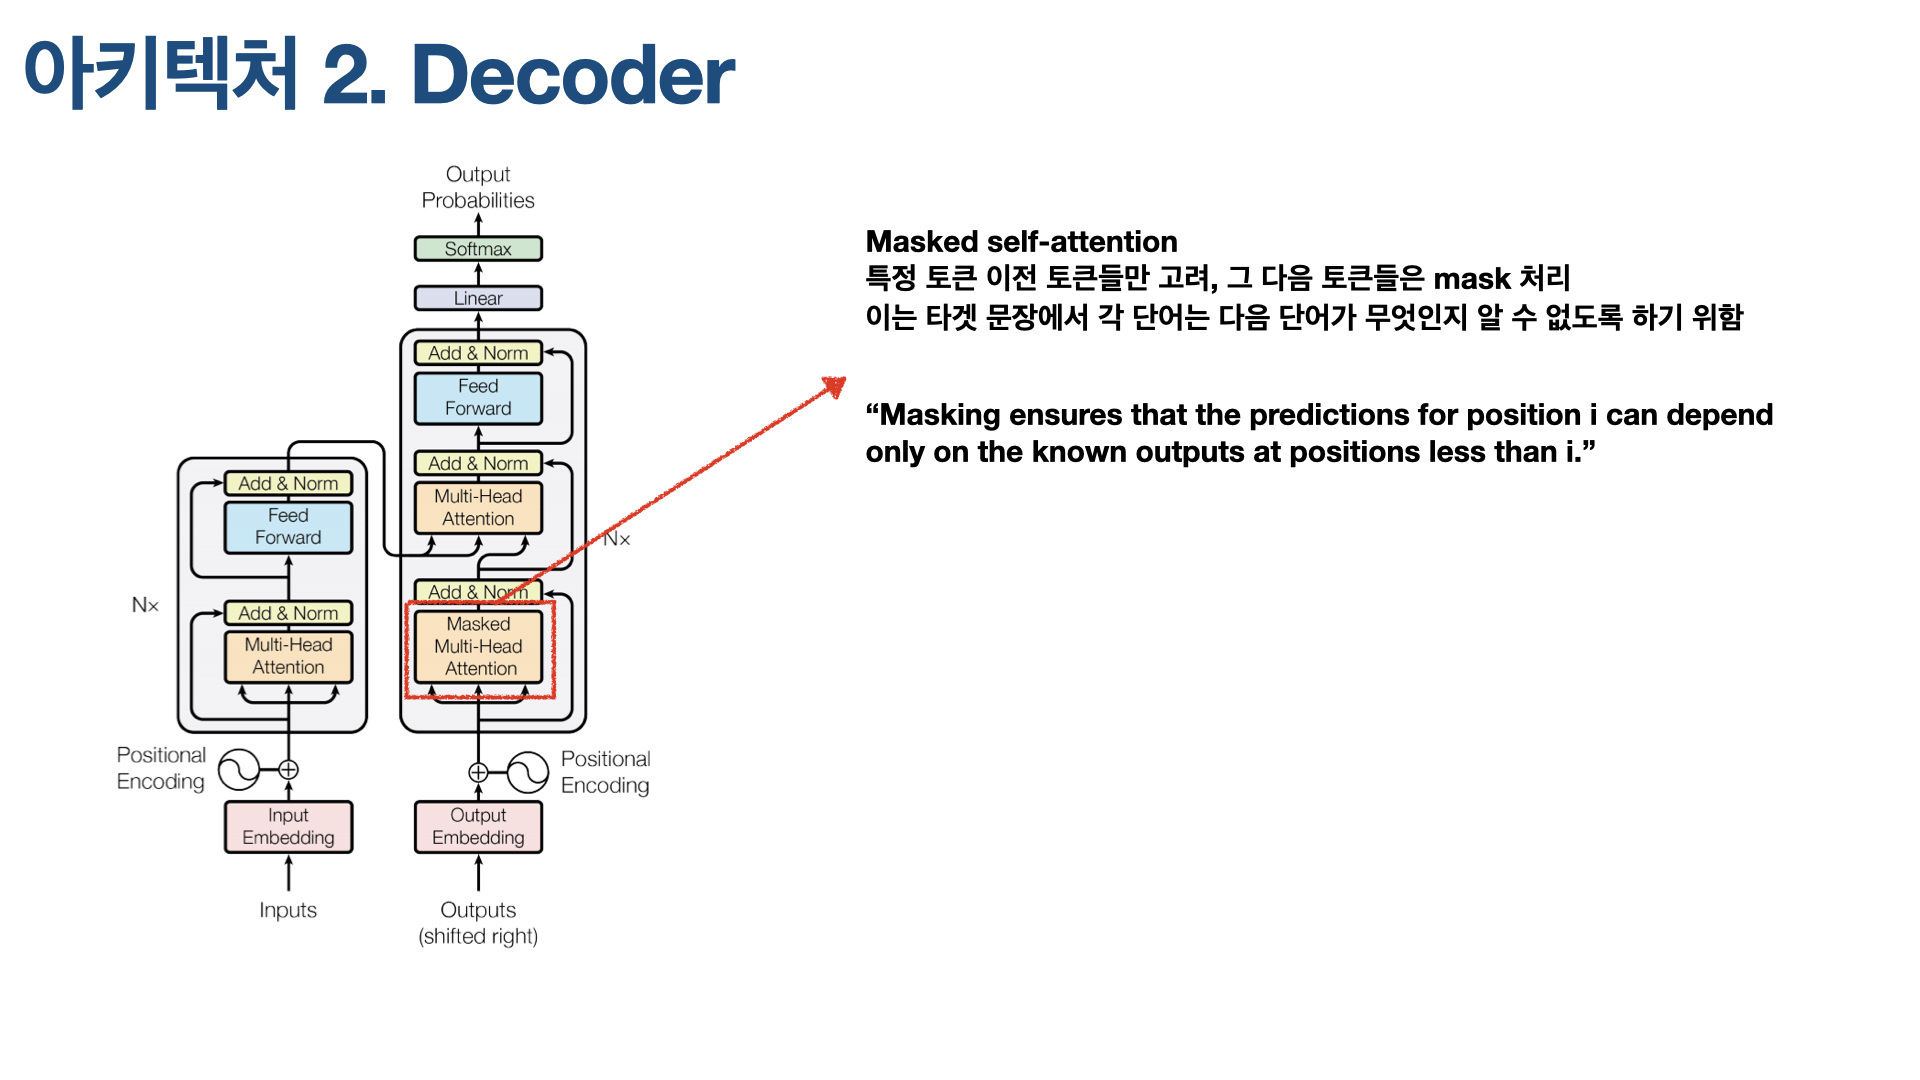

디코더에서 또 알아야 할 주요 개념이 Masked Attention이다. 디코더 아키텍처 가장 아래 있는 Self-Attention 레이어가 바로 Masked Multi-Head Attention인데, 이 Attention 레이어는 특정 토큰 이전 토큰들만 고려하기 위해 해당 토큰 다음에 나오는 토큰들을 가려(masked)버린다. 예를 들어, ‘나는 물을 벌컥벌컥 마셨다.’라는 문장에서 ‘벌컥벌컥’ 부분을 번역할 때 Transformer가 원하는 것은 ‘벌컥벌컥’에 해당하는 영어 표현을 출력하기 위해 ‘나는’과 ‘물을’까지 고려하길 원하는 것이다. 뒤에 오는 ‘마셨다’까지 고려하면 일종의 반칙이라고 간주하기 때문이다. 이를 위해 ‘마셨다’에 해당하는 토큰을 masked, 즉 가려버린다.

# 4. 3 types of Attention in Transformer

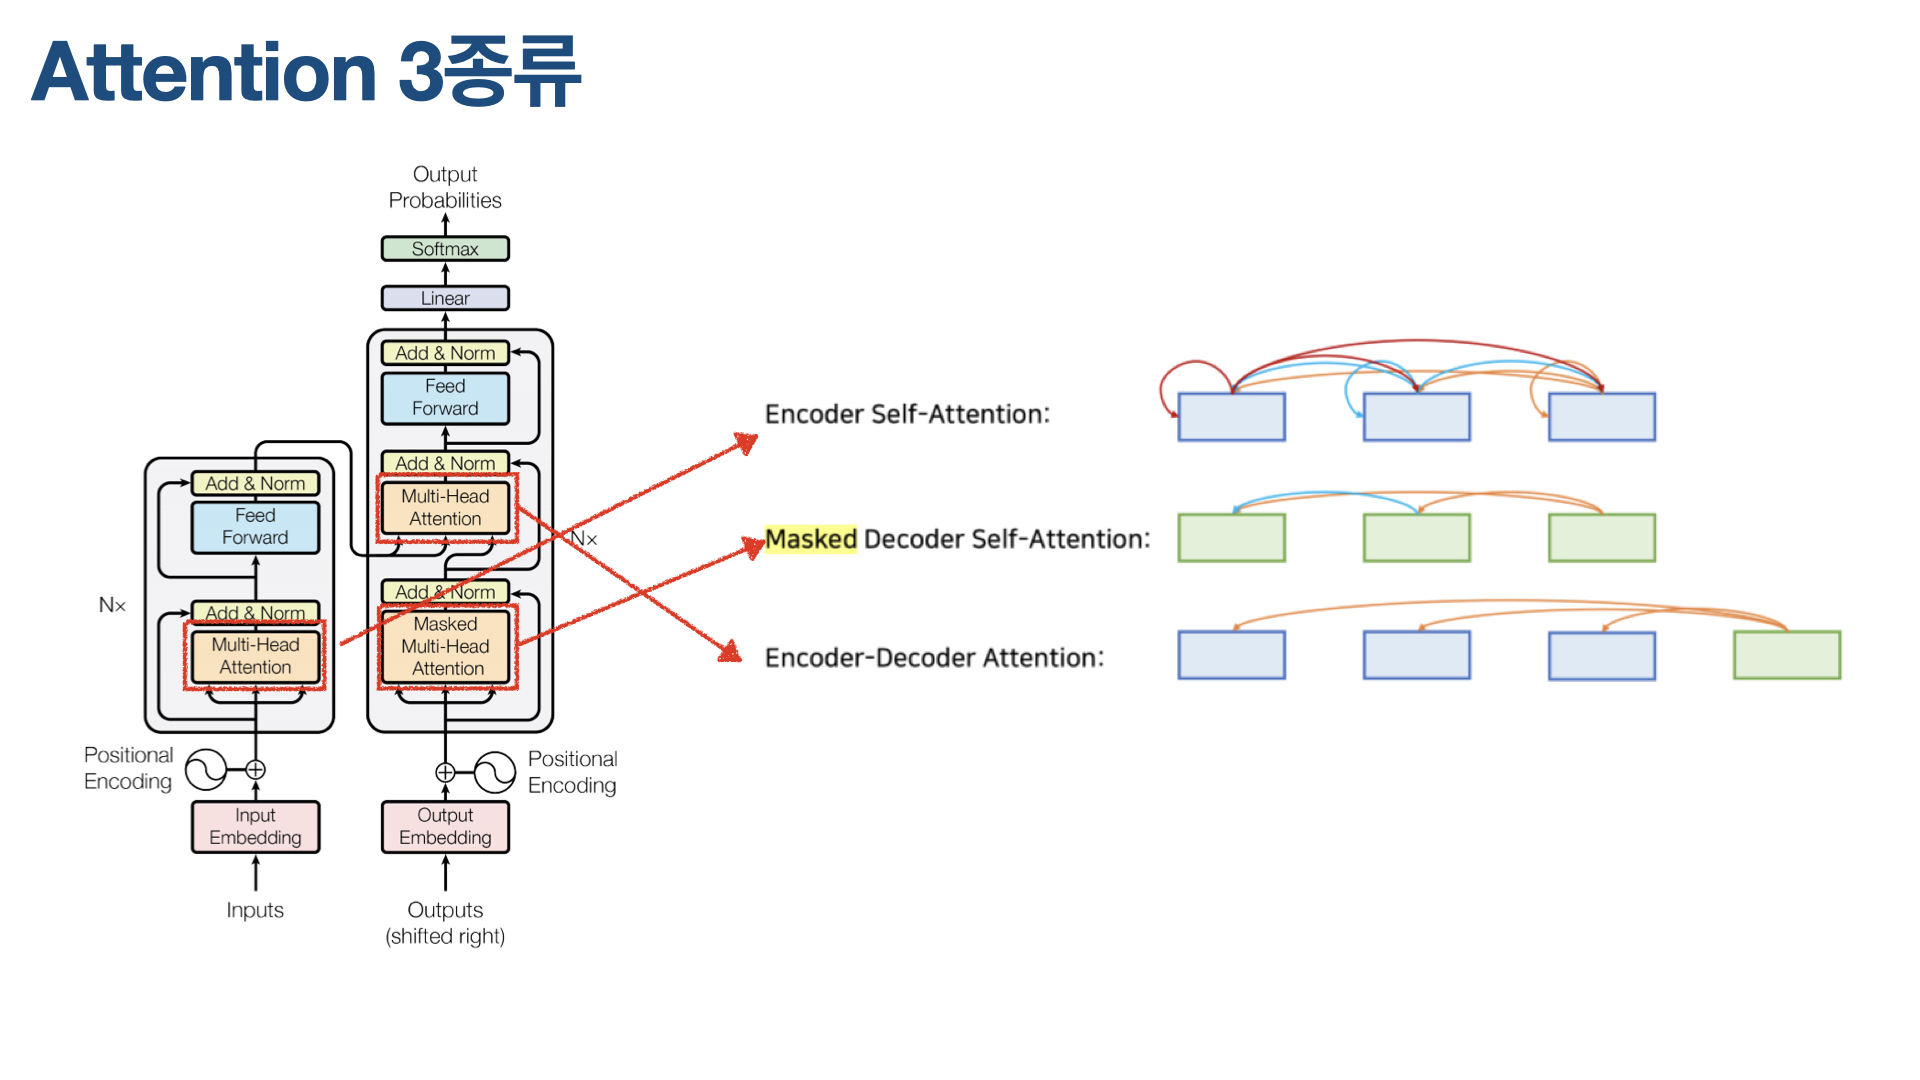

# 5. Conclusion

3줄 요약

Transformer는 Seq2Seq의 Encoder-Decoder 모델을 사용하되, RNN이나 CNN 네트워크 사용 X. Recurrent 네트워크는 단어를 하나씩 입력받아 순차 계산하므로, 학습 시간이 오래걸리고 문장이 길어질수록 정보 유실이 발생하는 한계가 있기 때문
Transformer는 Attention, 그중에서도 Self-Attention 사용
단어들의 위치 및 순서 정보는 Positional Encoding을 사용해 얻음
–> 이 방법은 모델 학습 시간은 단축하면서도 성능은 높였음.

2017년, Attnetion Is All You Need 논문이 발표됐을 당시, 이 논문이 제안한 Transformer는 WMT 2014 English-to-German translation test에서 BLUE 스코어 28.4를 기록해, 당시 최고점을 내고 있던 ConvS2S의 26.4를 앞질렀다. 하지만 2018년 제안된 Noisy back-translation 모델이 BLUE score 35.0을 기록했고, 현재(2021.03)까지 이 기록은 꺠지지 않고 있다.

참고한 자료

- [나동빈님의 유튜브 영상](https://www.youtube.com/watch?v=AA621UofTUA)
- [The Illustrated Transformer, by Jay Alamma](http://jalammar.github.io/illustrated-transformer/)